### Decision Tree

#### Pima Indians Diabetes Database
Predict the onset of diabetes based on diagnostic measures

In [47]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sn

In [4]:
# Load the dataset
col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
pima = pd.read_csv('diabetes.csv')
pima.columns=col_names

In [5]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Feature Selection
features = ['pregnant','glucose','bp','insulin','bmi','pedigree','age']
X = pima[features]  # Features
y = pima.label      # Target Variable

In [33]:
# Splitting Data
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [34]:
# Building a Decision Tree Model

# Create DT classifier object
clf = DecisionTreeClassifier()

# Train DT classifier
clf = clf.fit(X_train,y_train)

# Prediction
y_pred = clf.predict(X_test)

In [ ]:
# Evaluating a model
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.6796536796536796


In [35]:
# Improve the accuracy by pre-pruning
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))


Accuracy: 0.7705627705627706


#### Understand the data through statistics

In [15]:
pima_1 = pima[pima.label==1]
pima_1.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [16]:
pima_0 = pima[pima.label==0]
pima_0.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


In [17]:
pima.groupby('label').mean()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
label,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [19]:
pima.isna().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

### Visualizations

In [ ]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

#           | Pred N | Pred P
# Actual N  |   124  |  22
# Actual P  |   31   |  54

array([[124,  22],
       [ 31,  54]])

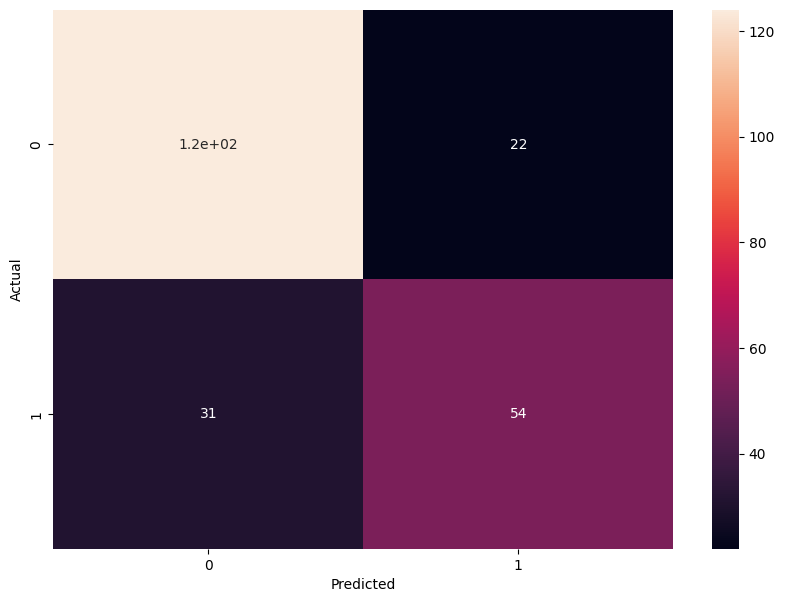

In [40]:
plt.figure(figsize=(10,7))
sn.heatmap(conf_matrix,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

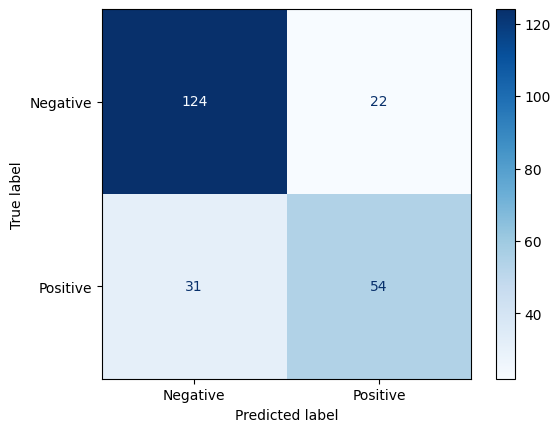

In [45]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues') 
plt.show()

### Performance Measures

In [48]:
precision_positive = precision_score(y_test,y_pred, pos_label=1)    
precision_negative = precision_score(y_test,y_pred, pos_label=0)
precision_positive, precision_negative 

(0.7105263157894737, 0.8)

In [49]:
recall_sensitivity = recall_score(y_test,y_pred, pos_label=1)  
recall_specificity = recall_score(y_test,y_pred, pos_label=0)
recall_sensitivity, recall_specificity 

(0.6352941176470588, 0.8493150684931506)

In [50]:
f1_p = f1_score(y_test,y_pred, pos_label=1)         
f1_n = f1_score(y_test,y_pred, pos_label=0)
f1_p, f1_n

(0.6708074534161491, 0.8239202657807309)

In [51]:
print(classification_report(y_test,y_pred))  

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       146
           1       0.71      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



#### Interpretation
1. Model performs better at identifying negative cases than postive cases
   
2. Higher recall for class 0 (0.85) than class 1 (0.64) means the model is better at detecting negatives but misses some postives.    (Recall = TP/TP+FN)
   
3. Lower precision for class 1 (0.71) suggests some false positives.
   
4. The model is fairly balanced.
   